<a href="https://colab.research.google.com/github/epicure24/MNIST-Digit-Recognizer/blob/master/Visualizing_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing MNIST 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/train.csv')

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


#Make data_feature that only contains pixel values

In [ ]:
data_feature = data.drop(['label'], axis=1)

# Reducing Dimesions using PCA

In [ ]:
# Scaling
scaler = MinMaxScaler()
# make dataframe of scaled pixel values
scaled_data = pd.DataFrame(scaler.fit_transform(data_feature), index=data_feature.index, columns=data_feature.columns)

# initialise PCA 
pca = PCA()
# apply the pca transform to the scaled values of the pixels
pca_transform = pca.fit_transform(scaled_data.values)

# the exact number of features that will retain 99% of the variance
variance = pca.explained_variance_ratio_.cumsum()
num_components = len(variance[variance>=.99])
num_components = data_feature.shape[1] - num_components

# initialise PCA with high variance components
pca = PCA(n_components=num_components)

# apply the new pca on the pixel values
data_reduced = pca.fit_transform(data_feature)

In [ ]:
# number of features retained after PCA
num_components

330

In [ ]:
# shape of the new low dimensional data
data_reduced.shape

(42000, 330)

In [ ]:
# total label or target values
Labels = np.unique(data.label)
Labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 2D Plot of the MNIST data with 330 feature values and 42000 datapoints

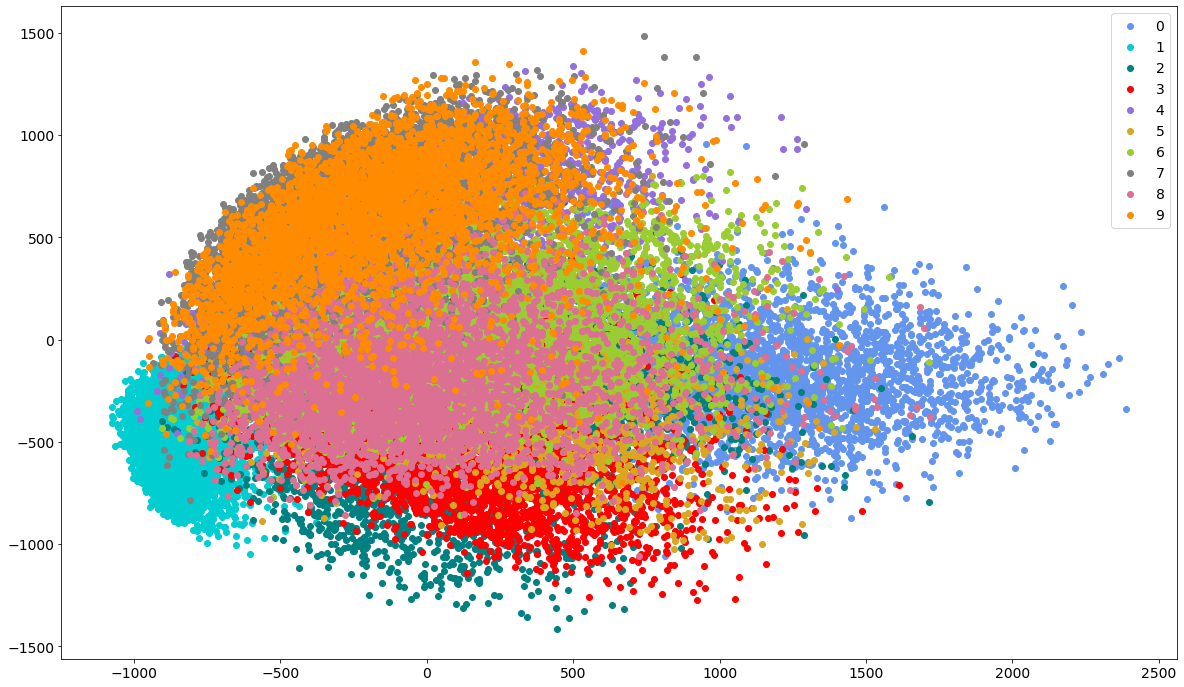

In [ ]:
colors = ['cornflowerblue','darkturquoise','teal','red','mediumpurple','goldenrod','yellowgreen','grey','palevioletred','darkorange']
plt.rcParams['figure.figsize'] = [20, 12]
plt.rc('font', size=14)
for i in Labels:
    subset = data_reduced[data.label == i]

    x = [row[0] for row in subset]
    y = [row[1] for row in subset]
    plt.scatter(x,y,c=colors[i],label=Labels[i])
plt.legend()
plt.show()

## Completion of Assignment 2